In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms

In [2]:
origin_file = 'datasets/L6N255_10000.h5'
o_h5 = h5py.File(origin_file, 'r')
o_h5.keys()

<KeysViewHDF5 ['Greens', 'anderson', 'chebyshev']>

In [3]:
for info in o_h5.values():
    print(info)


<HDF5 dataset "Greens": shape (10000, 256, 1, 1), type "<f8">
<HDF5 dataset "anderson": shape (10000, 8, 1, 1), type "<f8">
<HDF5 dataset "chebyshev": shape (10000, 256, 1, 1), type "<f8">


In [4]:
get_mean = lambda x: np.mean(x, axis=0)
get_var = lambda x: np.var(x, axis=0)
assert get_mean(o_h5['chebyshev']).shape == (256, 1, 1)
assert get_var(o_h5['chebyshev']).shape == (256, 1, 1)

In [6]:
# the input params
np.array(o_h5['anderson'][0]).flatten()
# 查看前10个系数第一个样本的值
np.array(o_h5['chebyshev'][0,:10,0,0])
# 查看第2个系数，前20个样本的值
np.array(o_h5['chebyshev'][:20, 0, 0, 0]), np.array(o_h5['chebyshev'][:20, 1, 0, 0])

(array([0.01290601, 0.01277061, 0.01279676, 0.01285391, 0.01293238,
        0.0128108 , 0.01301079, 0.01291236, 0.01287914, 0.01284311,
        0.01278402, 0.01291213, 0.01281261, 0.01279935, 0.01281451,
        0.01293533, 0.01281456, 0.01278714, 0.01290883, 0.01286495]),
 array([ 8.09744970e-04,  1.12968322e-03,  1.18299568e-03, -5.42523915e-04,
        -1.15423941e-03, -1.28145642e-03,  9.30704477e-04,  2.16470566e-03,
         1.62538512e-03, -6.15140793e-04, -6.63854941e-04,  1.64986845e-04,
        -1.33240003e-05, -1.55567772e-03,  2.04316642e-03, -2.17201249e-03,
        -1.45888187e-03, -1.61839098e-03, -1.37873521e-03, -1.08686816e-04]))

In [6]:
get_mean(o_h5['chebyshev'])[:10].flatten(), get_var(o_h5['chebyshev'])[:10].flatten()

(array([ 1.28805392e-02,  7.27999969e-06, -2.34766520e-02, -1.60489001e-05,
         1.94837428e-02,  1.42695210e-05, -1.47596272e-02, -3.78465676e-06,
         1.02519483e-02, -9.40793705e-06]),
 array([7.54050544e-09, 1.56241444e-06, 2.50586800e-07, 1.02891226e-05,
        4.23022690e-06, 1.83612735e-05, 1.40065379e-05, 2.14487752e-05,
        2.44378407e-05, 2.18723168e-05]))

In [15]:
c_train_file = 'datasets/chebyshev_10000.h5'
c_train_h5 = h5py.File(c_train_file, 'r')
get_mean(c_train_h5['chebyshev'])[:10].flatten(), get_var(c_train_h5['chebyshev'])[:10].flatten()

(array([ 1.00164272,  0.00683562, -0.99503256, -0.00593011,  0.97702321,
         0.00426259, -0.95495884, -0.00132035,  0.94074381, -0.00407169]),
 array([4.55992866e-05, 1.37749470e+00, 4.50153310e-04, 1.40479759e+00,
        1.06372324e-02, 1.63844369e+00, 5.86339745e-02, 2.61054238e+00,
        2.05775069e-01, 4.09690825e+00]))

In [19]:
chebyshev_median='datasets/chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'r')
c_h5['chebyshev_median'][:10].flatten()

array([0.01285941, 0.00106501, 0.02359385, 0.00270634, 0.01994194,
       0.00334762, 0.01545577, 0.00286639, 0.0108977 , 0.00231057])

In [20]:
7.27999969/0.00106501

6835.616275903513

In [4]:
c_test_file = 'datasets/chebyshev_testing_1000.h5'
c_test_h5 = h5py.File(c_test_file, 'r')
np.array(c_test_h5['anderson'][0]).flatten(), np.array(c_test_h5['chebyshev'][0,0,0,0])

(array([ 1.58997351,  2.27941756, -0.05643762, -2.71328907, -0.98162041,
         0.82658971,  0.85817836,  0.56812304]),
 array(0.99585183))

In [11]:
o_h5['chebyshev'].shape

(4000, 256, 1, 1)

In [12]:
c_np = np.array(o_h5['chebyshev'])
np.median(np.abs(c_np), axis = 0).shape

(256, 1, 1)

In [23]:
cheby_0 = np.median(np.abs(c_np[:, 0, 0, 0]), axis=0)

In [18]:
np.median(np.abs(c_np), axis = 0)[0]

array([[0.01285941]])

In [19]:
chebyshev_median='chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'w')
c_h5.create_dataset(name='chebyshev_median', data=np.median(np.abs(c_np), axis = 0))
c_h5.close()
o_h5.close()

# 使用median的数据集

In [12]:
# 制作测试集
if 0:
    test_file = 'datasets/L6N255_testing_1000.h5'
    test_h5 = h5py.File(test_file, 'r')
    
    chebyshev_median='datasets/chebyshev_median.h5'
    c_h5 = h5py.File(chebyshev_median, 'r')
    median_test = test_h5['chebyshev'][:] / c_h5['chebyshev_median'][:]
    
    save_name = 'datasets/chebyshev_testing_1000.h5'
    save_h5 = h5py.File(save_name, 'w')
    
    save_h5.create_dataset(name='chebyshev', data=median_test, dtype='float64')
    save_h5.create_dataset(name='anderson', data=test_h5['anderson'][:])
    
    save_h5.close()
    test_h5.close()
    c_h5.close()

In [5]:
# 制作训练集
train_file = 'datasets/L6N255_10000.h5'
train_h5 = h5py.File(train_file, 'r')

chebyshev_median='datasets/chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'r')
median_train = train_h5['chebyshev'][:] / c_h5['chebyshev_median'][:]

save_name = 'datasets/chebyshev_10000.h5'
save_h5 = h5py.File(save_name, 'w')

save_h5.create_dataset(name='chebyshev', data=median_train, dtype='float64')
save_h5.create_dataset(name='anderson', data=train_h5['anderson'][:])

save_h5.close()
train_h5.close()
c_h5.close()

In [6]:
# 制作训练集
train_file = 'datasets/L6N255_4000.h5'
train_h5 = h5py.File(train_file, 'r')

chebyshev_median='datasets/chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'r')
median_train = train_h5['chebyshev'][:] / c_h5['chebyshev_median'][:]

save_name = 'datasets/chebyshev_4000.h5'
save_h5 = h5py.File(save_name, 'w')

save_h5.create_dataset(name='chebyshev', data=median_train, dtype='float64')
save_h5.create_dataset(name='anderson', data=train_h5['anderson'][:])

save_h5.close()
train_h5.close()
c_h5.close()

In [11]:
# validate 
now_f = 'datasets/chebyshev_4000.h5'
old_f = 'datasets/chebyshev_0_4000.h5'
train_file = 'datasets/L6N255_4000.h5'
train_h5 = h5py.File(train_file, 'r')

now_h5 = h5py.File(now_f, 'r')
old_h5 = h5py.File(old_f, 'r')
print(now_h5['chebyshev'][:10, 0, 0, 0] - old_h5['chebyshev'][:10, 0, 0, 0])
print(now_h5['chebyshev'][:10, 1, 0, 0] - train_h5['chebyshev'][:10, 1, 0, 0])
import os
os.remove(old_f)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.17959818 -1.00865215  1.21257928  0.28860864 -0.02286223  0.46278252
 -0.75816548  1.23354466  0.30433273  1.00197992]


In [40]:

test_file = 'datasets/L6N255_testing_1000.h5'
test_h5 = h5py.File(test_file, 'r')


median_test.shape, median_test[0,:10, 0, 0], test_h5['chebyshev'][0,:10, 0, 0],  c_h5['chebyshev_median'][:10].flatten()

((1000, 256, 1, 1),
 array([ 0.99585183,  1.79472122, -1.01327828, -1.94266417,  1.06519988,
         2.36347458, -1.15787729, -3.4030798 ,  1.3004036 ,  4.65702547]),
 array([ 0.01280607,  0.00191139, -0.02390714, -0.00525751,  0.02124216,
         0.00791201, -0.01789589, -0.00975457,  0.01417141,  0.01076039]),
 array([0.01285941, 0.00106501, 0.02359385, 0.00270634, 0.01994194,
        0.00334762, 0.01545577, 0.00286639, 0.0108977 , 0.00231057]))

In [41]:
0.0107/0.0023

4.6521739130434785

# 准备test 5 的数据集
anderson： norm
 
chebyshev： median

In [10]:
# generate nom_meta
if 1:
    train_origin = 'datasets/L6N255_10000.h5'
    
    h5_origin = h5py.File(train_origin, 'r')
    anderson = torch.Tensor(h5_origin['anderson'][:])
    file_mean = 'datasets/10000_norm_meta.h5'
    h5_mean = h5py.File(file_mean, 'w')
    
    mean = torch.mean(anderson, dim=0)
    std = torch.std(anderson, dim=0)
    h5_mean.create_dataset(name='mean',data=mean, dtype='float64')
    h5_mean.create_dataset(name='std',data=std, dtype='float64')
    h5_mean.keys()
    h5_mean.close()

In [13]:
mean.shape, mean.flatten()

(torch.Size([8, 1, 1]),
 tensor([ 4.9823,  0.0073, -0.0058,  0.0429,  0.0430,  0.7434,  0.7557,  0.7468]))

In [14]:
# read
file_mean = 'datasets/10000_norm_meta.h5'
h5_mean = h5py.File(file_mean, 'r')
mean, std = h5_mean['mean'][:], h5_mean['std'][:]
h5_mean.close()

In [15]:
mean.shape, mean.flatten()

((8, 1, 1),
 array([ 4.98231173,  0.00727328, -0.00577093,  0.04291348,  0.04299883,
         0.74337214,  0.75566906,  0.74676955]))

In [16]:
chebyshev_median='datasets/chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'r')

In [17]:
# test5 需要的数据查看 
train_origin = 'datasets/L6N255_10000.h5'
file_train = 'datasets/norm_10000.h5'

h5_origin = h5py.File(train_origin, 'r')
anderson = torch.Tensor(h5_origin['anderson'][:])
norm_anderson = transforms.Normalize(mean, std)(anderson)
chebyshev = torch.Tensor(h5_origin['chebyshev'][:])
median_chebyshev = chebyshev / c_h5['chebyshev_median'][:]

h5_train = h5py.File(file_train, 'w')
h5_train.create_dataset(name='anderson', data=norm_anderson,dtype='float64')
h5_train.create_dataset(name='chebyshev', data=median_chebyshev, dtype='float64')
h5_train.close()

In [23]:
# test5 需要的数据查看 
test_origin = 'datasets/L6N255_testing_1000.h5'
file_test = 'datasets/norm_test_1000.h5'

h5_origin = h5py.File(test_origin, 'r')
anderson = torch.Tensor(h5_origin['anderson'][:])
norm_anderson = transforms.Normalize(mean, std)(anderson)
chebyshev = torch.Tensor(h5_origin['chebyshev'][:])
median_chebyshev = chebyshev / c_h5['chebyshev_median'][:]

h5_test = h5py.File(file_test, 'w')
h5_test.create_dataset(name='anderson', data=norm_anderson,dtype='float64')
h5_test.create_dataset(name='chebyshev', data=median_chebyshev, dtype='float64')
h5_test.close()

In [ ]:
# 规范化是否合理
plt.plot(norm_anderson[:10,0,0,0])
plt.plot(anderson[:10,0,0,0])

In [29]:
file_1 = 'datasets/norm_test_1000.h5'
file_2 = 'datasets/L6N255_testing_1000.h5'
h5_1= h5py.File(file_1, 'r')
h5_2= h5py.File(file_2, 'r')
h5_1['anderson'].shape, h5_1['chebyshev'].shape
h5_1['anderson'][0,:,0,0], h5_1['chebyshev'][0,:10,0,0],h5_2['anderson'][0,:,0,0], h5_2['chebyshev'][0,:10,0,0]

(array([-1.17670524,  1.57700872, -0.01769103, -0.95797795, -0.35424122,
         0.19169877,  0.23645437, -0.41081271]),
 array([ 0.99585184,  1.79472123, -1.01327824, -1.94266424,  1.06519986,
         2.36347455, -1.15787728, -3.40307985,  1.30040356,  4.65702528]),
 array([ 1.58997351,  2.27941756, -0.05643762, -2.71328907, -0.98162041,
         0.82658971,  0.85817836,  0.56812304]),
 array([ 0.01280607,  0.00191139, -0.02390714, -0.00525751,  0.02124216,
         0.00791201, -0.01789589, -0.00975457,  0.01417141,  0.01076039]))

#validate the same as old loss.

In [ ]:
if 0:
    # modify loss save formate to upper formate
    losses_file = ['nn_7bk/loss_1.h5', 'nn_14bk/loss_2.h5','nn_14bk/loss_3.h5','nn_14bk/loss_4.h5','nn_14bk/loss_5.h5']
    new_files = ['nn_7/loss_1.h5', 'nn_14/loss_2.h5','nn_14/loss_3.h5','nn_14/loss_4.h5','nn_14/loss_5.h5']
    for i in range(len(losses_file)):
        old = h5py.File(losses_file[i], 'r')
        new = h5py.File(new_files[i], 'w')
        train_b = old['model_000']['log_dict']['train_loss_per_batch'][:]
        train_e = old['model_000']['log_dict']['train_loss_per_epoch'][:]
        validate_b = old['model_000']['log_dict']['validate_loss_per_batch'][:]
        validate_e = old['model_000']['log_dict']['validate_loss_per_epoch'][:]
        test_b = old['model_000']['test_log_dict']['test_loss_per_batch'][:]
        test_e = old['model_000']['test_log_dict']['test_loss_per_epoch'][:]
        
        grp = new.create_group(name='model_000')
        grp.create_dataset(name='train_loss_per_batch', data=train_b, dtype='float64')
        grp.create_dataset(name='train_loss_per_epoch', data=train_e, dtype='float64')
        grp.create_dataset(name='validate_loss_per_batch', data=validate_b, dtype='float64')
        grp.create_dataset(name='validate_loss_per_epoch', data=validate_e, dtype='float64')
        grp.create_dataset(name='test_loss_per_batch', data=test_b, dtype='float64')
        grp.create_dataset(name='test_loss_per_epoch', data=test_e, dtype='float64')
        old.close()
        new.close()
plot_loss_epoch('nn_14/loss_2.h5', title='new h5')


# 制作数据集
通过之前的测试，anderson模型使用规范化后，训练误差基本没有变，但是通过后续实验发现，在预测chebyshev不同的系数时
1. 需要不同的学习率初始值
2. 训练loss差别很大，会不会是因为数据分布不好，可以通过batchnorm和输入规范化进行改善吗？
那我们对输入不做处理，对输出做规范化处理，试一试效果怎么要，首先制作数据集

In [12]:
input_file = 'datasets/L6N255_10000.h5'
# get mean and var in each chebyshev node.
inputh5 = h5py.File(input_file, 'r')
input_c = torch.Tensor(inputh5['chebyshev'][:])
i_c_std , i_c_mean = torch.std_mean(input_c, dim=0)
chebyshev_norm='datasets/chebyshev_norm_10000.h5'
c_norm_meta = 'datasets/c_norm_meta.h5'
meta_h5 = h5py.File(c_norm_meta, 'w')
meta_h5.create_dataset(name='std', data=i_c_std)
meta_h5.create_dataset(name='mean', data=i_c_mean)
meta_h5.close()
norm_c = transforms.Normalize(i_c_mean, i_c_std)(input_c)
c_norm_h5 = h5py.File(chebyshev_norm, 'w')
c_norm_h5.create_dataset(name='chebyshev', data=norm_c)
c_norm_h5.create_dataset(name='anderson', data=inputh5['anderson'][:])
c_norm_h5.close()

In [3]:
# 测试集

c_norm_meta = 'datasets/c_norm_meta.h5'
test_c = 'datasets/L6N255_testing_1000.h5'
def gen_c_norm(file, meta_f, save_f):
    h5 = h5py.File(file, 'r')
    anderson = h5['anderson'][:]
    chebyshev = torch.Tensor(h5['chebyshev'][:])
    meta_h5 = h5py.File(meta_f, 'r')
    std, mean = meta_h5['std'][:], meta_h5['mean'][:]
    c_norm = transforms.Normalize(mean, std)(chebyshev)
    save_f = h5py.File(save_f, 'w')
    save_f.create_dataset(name = 'anderson', data = anderson)
    save_f.create_dataset(name = 'chebyshev', data= c_norm)
    save_f.close()
    h5.close()
    meta_h5.close()

gen_c_norm(test_c, c_norm_meta, 'datasets/chebyshev_norm_testing_1000.h5')

In [31]:
norm_c.shape, input_c.shape, np.mean(np.array(input_c), axis=0).shape #, input_c[0, :10].flatten()


(torch.Size([10000, 256, 1, 1]), torch.Size([10000, 256, 1, 1]), (256, 1, 1))

(tensor([ 0.0008,  0.0011,  0.0012, -0.0005, -0.0012, -0.0013,  0.0009,  0.0022,
          0.0016, -0.0006]),
 tensor([ 0.6420,  0.8979,  0.9406, -0.4398, -0.9292, -1.0310,  0.7387,  1.7259,
          1.2945, -0.4979]))

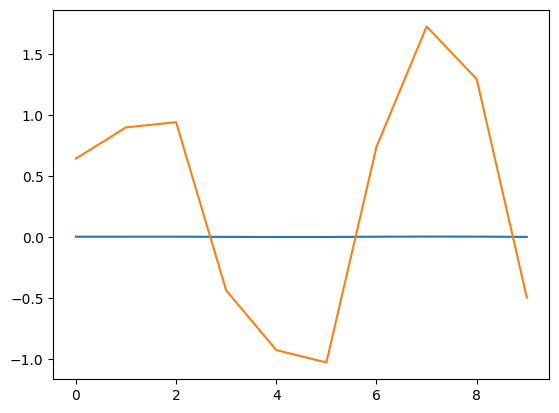

In [25]:
# 通过规范化，让他们的数据符合均方根分布。是否会加快训练速度，超参数选择更加鲁棒。？
plt.plot(np.arange(10), input_c[:10, 1, 0, 0], norm_c[:10, 1, 0, 0])
input_c[:10, 1, 0, 0], norm_c[:10, 1, 0, 0]